In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
credit_card=pd.read_csv("creditcard.csv")
credit_card.columns=credit_card.columns.str.strip()

In [4]:
credit_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
credit_card.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
41678,40781,-0.447381,1.134089,0.534095,-0.192366,1.344408,-0.370402,1.088646,-0.094025,-0.444502,...,-0.050234,-0.092340,-0.463501,-0.908485,0.202750,-0.506844,-0.058317,-0.085094,1.00,0.0
41679,40782,1.133168,0.406826,0.956032,2.315761,-0.242409,0.225013,-0.295703,0.130832,-0.768433,...,0.180411,0.487918,-0.121882,0.029950,0.465114,0.097369,0.010912,0.018509,10.65,0.0
41680,40783,-0.536190,1.355132,0.064049,0.884589,0.581654,-0.179437,0.466058,0.213312,-0.130088,...,-0.013520,0.198903,-0.112066,-0.505780,-0.266556,-0.349786,-0.367509,-0.399716,1.00,0.0
41681,40783,-0.498757,0.332449,1.917148,-2.340131,-1.098398,-0.863136,-0.055820,-0.084046,1.673677,...,0.371752,1.441352,-0.250882,0.483504,-0.140917,-0.613552,0.380606,0.226502,26.59,0.0
41682,40784,-0.621229,-0.733600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
credit_card.shape

(41683, 31)

In [7]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41683 entries, 0 to 41682
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    41683 non-null  int64  
 1   V1      41683 non-null  float64
 2   V2      41683 non-null  float64
 3   V3      41682 non-null  float64
 4   V4      41682 non-null  float64
 5   V5      41682 non-null  float64
 6   V6      41682 non-null  float64
 7   V7      41682 non-null  float64
 8   V8      41682 non-null  float64
 9   V9      41682 non-null  float64
 10  V10     41682 non-null  float64
 11  V11     41682 non-null  float64
 12  V12     41682 non-null  float64
 13  V13     41682 non-null  float64
 14  V14     41682 non-null  float64
 15  V15     41682 non-null  float64
 16  V16     41682 non-null  float64
 17  V17     41682 non-null  float64
 18  V18     41682 non-null  float64
 19  V19     41682 non-null  float64
 20  V20     41682 non-null  float64
 21  V21     41682 non-null  float64
 22

In [8]:
credit_card.isna().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [9]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,41683.000000,41683.000000,41683.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,...,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000
mean,26208.345609,-0.222499,0.035454,0.711902,0.186781,-0.234719,0.099510,-0.112246,0.044579,0.193708,...,-0.028417,-0.111341,-0.040301,0.007295,0.136259,0.023199,0.008003,0.004864,89.104007,0.002591
std,12721.514541,1.855101,1.599923,1.490121,1.399707,1.387375,1.309662,1.238350,1.209428,1.220092,...,0.744449,0.638250,0.565217,0.593050,0.436860,0.504139,0.387877,0.341927,237.163503,0.050837
min,0.000000,-56.407510,-72.715728,-31.103685,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,16853.000000,-0.974000,-0.533197,0.229759,-0.719018,-0.842162,-0.638071,-0.598424,-0.151197,-0.568666,...,-0.235257,-0.533250,-0.179117,-0.324744,-0.127717,-0.329707,-0.063304,-0.006814,7.500000,0.000000
50%,31305.000000,-0.240189,0.093834,0.811276,0.185168,-0.272258,-0.156277,-0.073482,0.050183,0.071496,...,-0.074873,-0.085641,-0.051385,0.060759,0.175870,-0.064901,0.008653,0.021615,24.000000,0.000000
75%,36289.000000,1.159396,0.740067,1.443056,1.069459,0.293052,0.485883,0.432308,0.318625,0.906980,...,0.102520,0.300633,0.077243,0.400073,0.421184,0.304378,0.085015,0.076216,80.000000,0.000000
max,40784.000000,1.960497,16.713389,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


In [10]:
ZScores=stats.zscore(credit_card)
Threshold=3
outliers=(ZScores>Threshold)|(ZScores<Threshold)
new_data=credit_card[outliers.any(axis=1)]

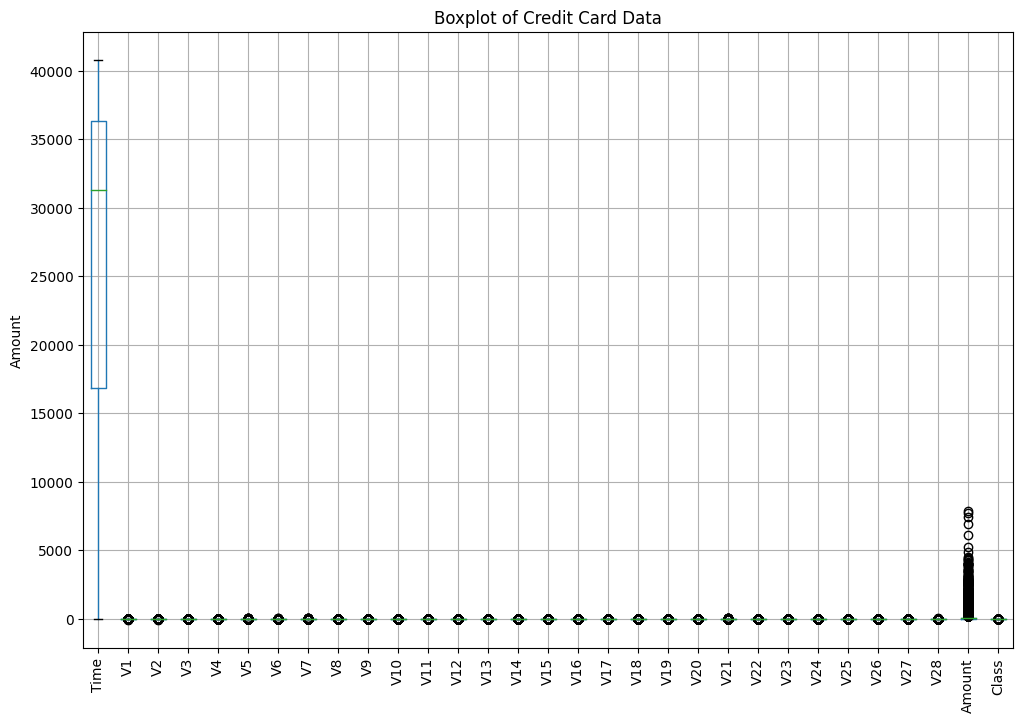

In [11]:
plt.figure(figsize=(12,8))
new_data.boxplot()
plt.title("Boxplot of Credit Card Data")
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

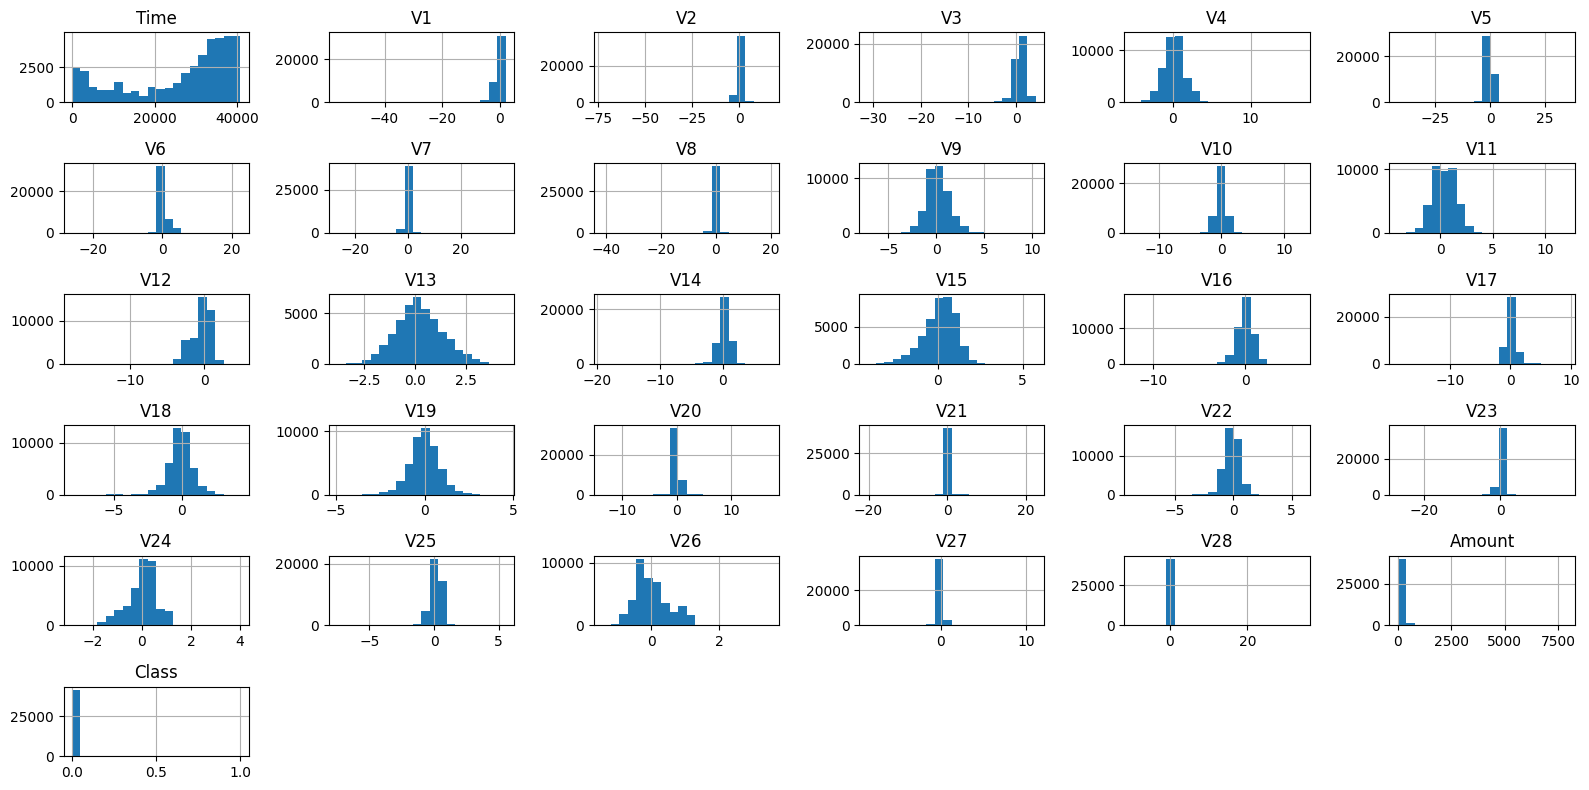

In [12]:
new_data.hist(figsize=(16,8),bins=20)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Amount')

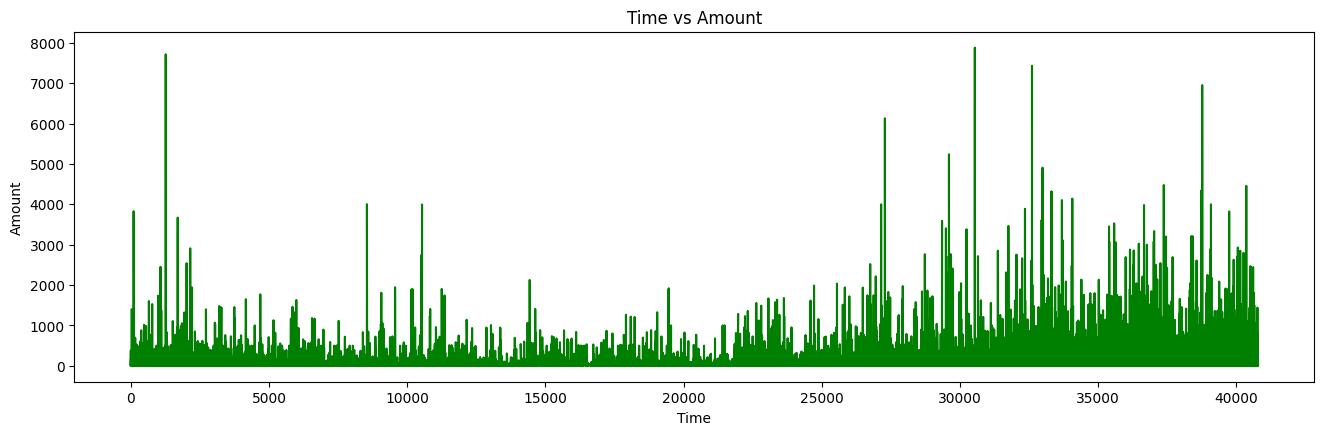

In [15]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.plot(new_data['Time'],new_data['Amount'],color='green')
plt.title('Time vs Amount')
plt.xlabel("Time")
plt.ylabel("Amount")


In [17]:
stats = new_data.agg({
  'Time':['mean','median','max','std'],
  'Amount':['mean','median','max','std'],
})


In [18]:
new_data['Time_sin'] = np.sin(new_data['Time'])  # Assuming Time is numerical
new_data['Amount_sin'] = np.sin(new_data['Amount'])  # Assuming Amount is numerical

stats = new_data.agg({
  'Time':['mean','median','max','std'],
  'Amount':['mean','median','max','std'],
})


In [19]:
co_relation=new_data[new_data.columns].corr()
co_relation.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_sin,Amount_sin
Time,1.000000,0.006892,-0.116101,-0.058683,-0.039482,-0.074010,-0.010815,-0.004010,0.043109,-0.338525,...,-0.004548,-0.012441,0.046905,-0.025220,-0.013875,0.003108,0.078901,-0.019203,-0.010852,-0.002467
V1,0.006892,1.000000,-0.053613,0.278379,-0.089242,0.059272,0.109394,0.149244,-0.089683,-0.047273,...,-0.081625,-0.009902,0.169179,0.025128,-0.089070,0.076852,-0.226201,-0.198702,-0.007503,-0.018534
V2,-0.116101,-0.053613,1.000000,-0.197907,0.093666,-0.120363,0.003955,-0.028430,0.066110,-0.006851,...,-0.029812,-0.021221,-0.103603,-0.041910,0.073199,-0.076136,-0.516976,0.177111,0.008682,0.085391
V3,-0.058683,0.278379,-0.197907,1.000000,-0.131672,0.275977,-0.008502,0.319131,-0.271801,0.151503,...,0.046546,0.030306,-0.193826,0.054365,-0.146882,0.038569,-0.179114,-0.387742,-0.006591,-0.089653
V4,-0.039482,-0.089242,0.093666,-0.131672,1.000000,-0.044167,-0.047445,-0.083321,0.083793,-0.004335,...,-0.004145,-0.012775,-0.012686,0.018461,0.054638,0.001633,0.095031,0.206212,0.004421,0.018298


<Axes: >

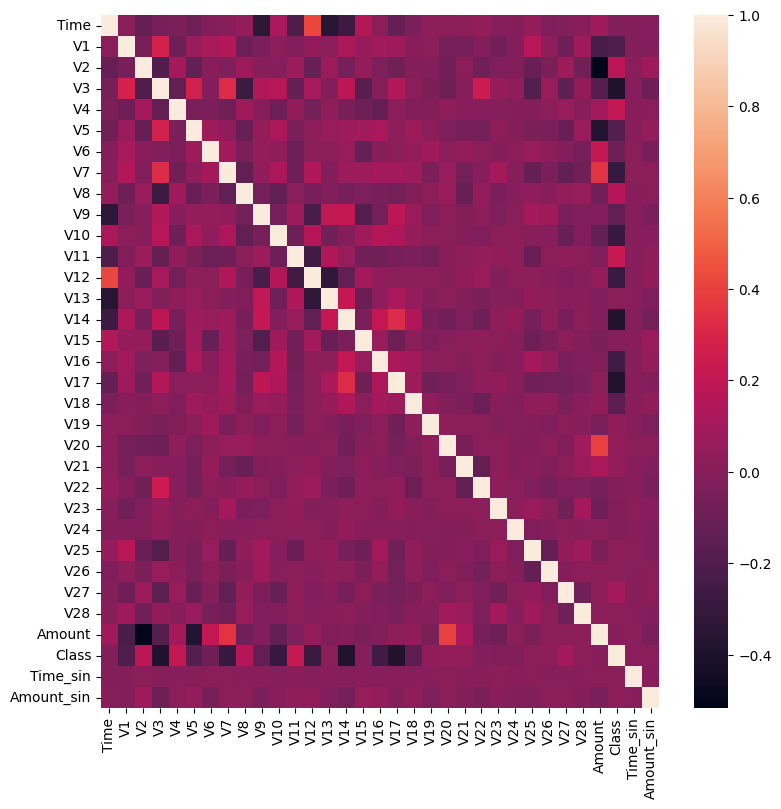

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(co_relation,annot=None)